In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

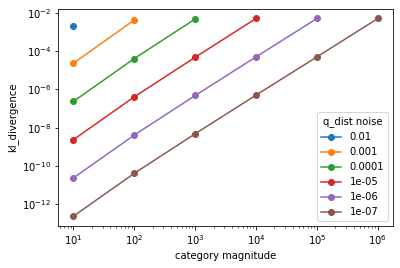

In [2]:
seed=42
plots = dict()


for j in range(6):
    e = 10**(-(j+2))
    plots[e] = []
    for i in range(6):
        n = 10**(i + 1)
        p = np.array([1/n] * n)
        q = p + stats.norm.rvs(loc=0, scale=e, size=n, random_state=seed)
        kl_divergence = stats.entropy(p, q)
        plots[e].append((n, kl_divergence))
    dims = [dim for dim in zip(*plots[e])]
    plt.plot(dims[0], dims[1], marker='o', label=str(e))

plt.yscale("log")
plt.xscale("log")
plt.ylabel("kl_divergence")
plt.xlabel("category magnitude")
plt.legend(title="q_dist noise", loc="lower right")
plt.show()

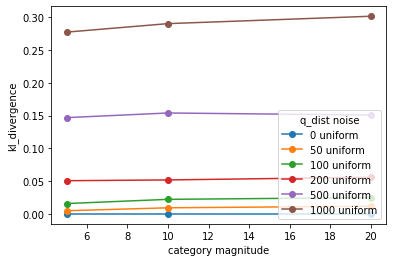

In [3]:
seed=42
n = 1000
b = 1
plots = dict()

#for b in [1, 1.5, 2]:
#    plots[b] = []
for noise in [0, 50, 100, 200, 500, 1000]:
    plots[noise] = []
    for n_bins in [5, 10, 20]:
        p = np.histogram(stats.pareto.rvs(b, size=n, random_state=seed), bins=np.linspace(0, 25, n_bins+1))[0]
        noise_counts = stats.multinomial.rvs(n=noise, p=[1/n_bins]*n_bins, random_state=seed)
        q = p + noise_counts
        p = p / n
        q = q / (n + noise)
        kl_divergence = stats.entropy(p, q)
        plots[noise].append((n_bins, kl_divergence))
    dims = [dim for dim in zip(*plots[noise])]
    plt.plot(dims[0], dims[1], marker='o', label=str(noise) + " uniform")

# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("kl_divergence")
plt.xlabel("category magnitude")
plt.legend(title="q_dist noise", loc="lower right")
plt.show()

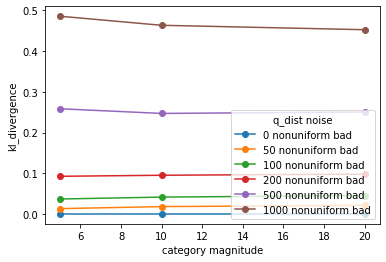

In [4]:
seed=42
n = 1000
b = 1
plots = dict()


for noise in [0, 50, 100, 200, 500, 1000]:
    plots[noise] = []
    for n_bins in [5, 10, 20]:
        p = np.histogram(stats.pareto.rvs(b, size=n, random_state=seed), bins=np.linspace(0, 25, n_bins+1))[0]
        noise_p = np.linspace(0,1,n_bins)
        noise_p = noise_p / np.sum(noise_p)
        noise_counts = stats.multinomial.rvs(n=noise, p=noise_p, random_state=seed)
        q = p + noise_counts
        p = p / n
        q = q / (n + noise)
        kl_divergence = stats.entropy(p, q)
        plots[noise].append((n_bins, kl_divergence))
    dims = [dim for dim in zip(*plots[noise])]
    plt.plot(dims[0], dims[1], marker='o', label=str(noise) + " nonuniform bad")

plt.ylabel("kl_divergence")
plt.xlabel("category magnitude")
plt.legend(title="q_dist noise", loc="lower right")
plt.show()

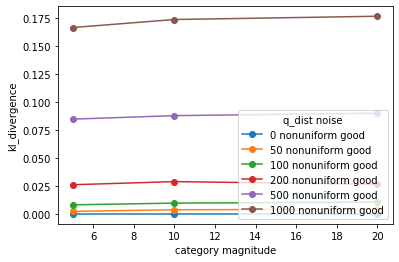

In [5]:
seed=42
n = 1000
b = 1
plots = dict()


for noise in [0, 50, 100, 200, 500, 1000]:
    plots[noise] = []
    for n_bins in [5, 10, 20]:
        p = np.histogram(stats.pareto.rvs(b, size=n, random_state=seed), bins=np.linspace(0, 25, n_bins+1))[0]
        noise_p = np.linspace(1,0,n_bins+1)[:-1]
        noise_p = noise_p / np.sum(noise_p)
        noise_counts = stats.multinomial.rvs(n=noise, p=noise_p, random_state=seed)
        q = p + noise_counts
        p = p / n
        q = q / (n + noise)
        kl_divergence = stats.entropy(p, q)
        plots[noise].append((n_bins, kl_divergence))
    dims = [dim for dim in zip(*plots[noise])]
    plt.plot(dims[0], dims[1], marker='o', label=str(noise) + " nonuniform good")

plt.ylabel("kl_divergence")
plt.xlabel("category magnitude")
plt.legend(title="q_dist noise", loc="lower right")
plt.show()

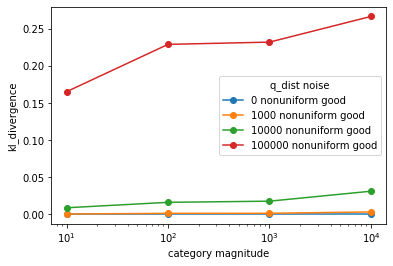

In [6]:
seed=42
n = 100000
b = 1
plots = dict()


for noise in [0, 1000, 10000, 100000]:
    plots[noise] = []
    for n_bins in [10, 100, 1000, 10000]:
        p = np.histogram(stats.pareto.rvs(b, size=n, random_state=seed), bins=np.linspace(0, 25, n_bins+1))[0]
        noise_p = np.linspace(1,0,n_bins+1)[:-1]
        noise_p = noise_p / np.sum(noise_p)
        noise_counts = stats.multinomial.rvs(n=noise, p=noise_p, random_state=seed)
        q = p + noise_counts
        p = p / n
        q = q / (n + noise)
        kl_divergence = stats.entropy(p, q)
        plots[noise].append((n_bins, kl_divergence))
    dims = [dim for dim in zip(*plots[noise])]
    plt.plot(dims[0], dims[1], marker='o', label=str(noise) + " nonuniform good")

plt.xscale("log")
    
plt.ylabel("kl_divergence")
plt.xlabel("category magnitude")
plt.legend(title="q_dist noise", loc="right")
plt.show()

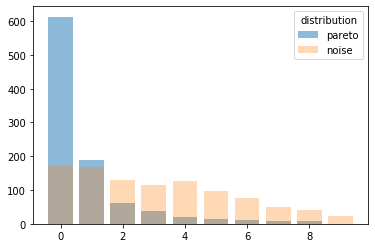

In [7]:
seed=42
n = 1000
noise = 1000
n_bins = 10
b = 1


#plt.hist(stats.pareto.rvs(b, size=n, random_state=seed), label="pareto", alpha=0.5, bins=np.linspace(0, 25, n_bins+1))
p = np.histogram(stats.pareto.rvs(b, size=n, random_state=seed), bins=np.linspace(0, 25, n_bins+1))[0]
noise_p = np.linspace(1,0,n_bins+1)[:-1]
noise_p = noise_p / np.sum(noise_p)
noise_counts = stats.multinomial.rvs(n=noise, p=noise_p, random_state=seed)
# q = p + noise_counts
# p = p / n
# q = q / (n + noise)
plt.bar([x for x in range(n_bins)], p, label="pareto", alpha=0.5)
plt.bar([x for x in range(n_bins)], noise_counts, label="noise", alpha=0.3)

#plt.hist(, label="noise", alpha=0.5)
plt.legend(title="distribution")

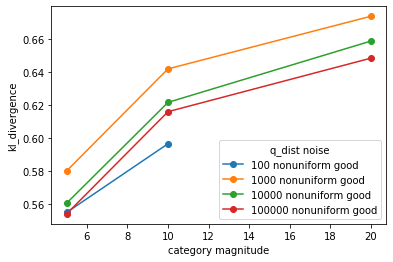

In [8]:
seed=42
n = 100000
b = 1
plots = dict()


for noise in [100, 1000, 10000, 100000]:
    plots[noise] = []
    for n_bins in [5, 10, 20]:
        p = np.histogram(stats.pareto.rvs(b, size=n, random_state=seed), bins=np.linspace(0, 25, n_bins+1))[0]
        noise_p = np.linspace(1,0,n_bins+1)[:-1]
        noise_p = noise_p / np.sum(noise_p)
        noise_counts = stats.multinomial.rvs(n=noise, p=noise_p, random_state=seed)
        p = p / n
        q = noise_counts / noise
        kl_divergence = stats.entropy(p, q)
        plots[noise].append((n_bins, kl_divergence))
    dims = [dim for dim in zip(*plots[noise])]
    plt.plot(dims[0], dims[1], marker='o', label=str(noise) + " nonuniform good")

plt.ylabel("kl_divergence")
plt.xlabel("category magnitude")
plt.legend(title="q_dist noise", loc="lower right")
plt.show()